In [63]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipywidgets as ipw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import Edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### GBM dinamic plots

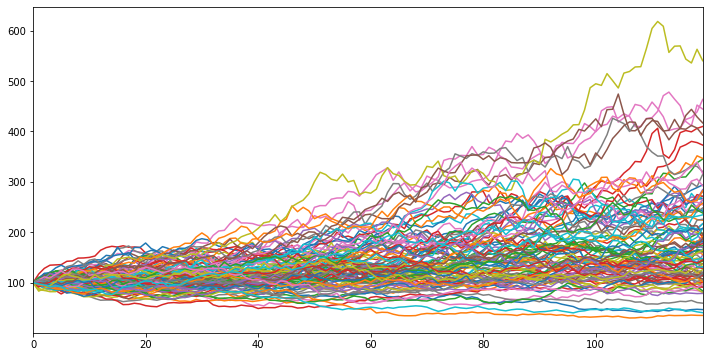

In [5]:
erk.generate_brownian_motion(10, 100).plot(figsize=(12,6),legend=False)

In [8]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Dynamic plot for GBM
    
    """
    s_0 = 100
    prices = erk.generate_brownian_motion(n_scenarios=n_scenarios, mu=mu, sigma = sigma, s_0 = s_0)
    ax = prices.plot(legend=False, figsize=(12,6), color="indianred", alpha=0.5, linewidth=2)
    ax.axhline(y = s_0, ls=":", color="black")
    ax.plot(0,s_0,marker="o",color="darkred",alpha=0.2)

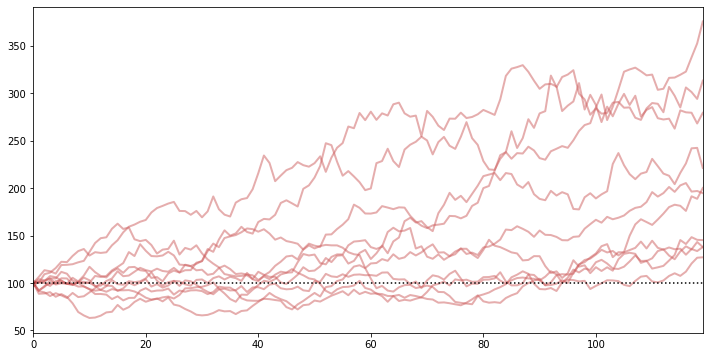

In [9]:
show_gbm(10, 0.07, 0.15)

In [12]:
controls = ipw.interactive(show_gbm,
                           n_scenarios = (1,20,1), #(min,max,step_size)
                           mu = (0,0.2,0.01),
                           sigma = (0,0.3,0.01)
                          )

In [13]:
display(controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.1, de…

### Interactive CPPI Code - Monte Carlo

In [62]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.8, risk_free_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    
    """
    start = 100
    risky_r = erk.generate_brownian_motion(n_scenarios=n_scenarios, mu=mu, sigma = sigma, s_0 = start, prices=False)
    risky_ret = pd.DataFrame(risky_r)
    btr = erk.CPPI(risky_ret, risk_free_rate=risk_free_rate, multiplier=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    
    # Calculate terminal wealth Stats
    terminal_wealth = wealth.iloc[-1]
    y_max = wealth.values.max()*y_max/100
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    tw_max = terminal_wealth.max()
    tw_min = terminal_wealth.min()
    tw_diff = tw_max - tw_min
    faliure_mask = np.less(terminal_wealth, start*floor)
    n_faliurs = faliure_mask.sum()
    p_fail = n_faliurs/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, faliure_mask)/n_faliurs if n_faliurs > 0 else 0.0
    
    # plot a frame For showing histogram for the arrangements ofthe number of component returns in a range
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]},figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred", figsize=(24,9))
    wealth_ax.axhline(y = start, ls=":", color="black",linewidth=3)
    wealth_ax.axhline(y = start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec="w", fc="indianred", orientation="horizontal")
    hist_ax.axhline(y = start, ls=":", color="black",linewidth=3)
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Difference: ${int(tw_diff)}", xy=(.7, .75),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Worst case: ${int(tw_min)}", xy=(.7, .65),xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_faliurs} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", 
                         xy=(.7, .55), xycoords='axes fraction', fontsize=20)
    
cppi_controls = ipw.interactive(show_cppi,
                                n_scenarios = ipw.IntSlider(min=1, max=1000, step=5, value=50),
                                mu = (0, +0.2, 0.01),
                                sigma = (0, 0.3, 0.05),
                                floor = (0, 2., 0.1),
                                m = (1, 5, 0.5),
                                risk_free_rate = (0, 0.05, 0.01),
                                y_max = ipw.IntSlider(min=0, max=100, step=1, value=100,
                                                      description="Zoom Y Axis")
                               )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [64]:
erk.dynamic_CPPI_plot()

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…